타이타닉 생존자 예측을 위한 EDA

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

In [3]:
# 데이터를 DataFrame으로 변경 후 작업해야겠다.
import seaborn as sns
df = sns.load_dataset("titanic") # DataFrame
df.head(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
df.info() # 결측치 채우고, 데이터 타입 전부 숫자로, 너무 많이 빈 것은 데이터 분석에 사용하는 것 포기

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [5]:
df.describe() # std 분산, min, max

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
missing_value = df.isnull().sum()
missing_percent = (missing_value /len(df)) * 100
missing_percent # deck은 포기, age는 일단 평균으로 채우자, 하지만 age가 중요한 factor가 되면 다시 age로 돌아와서 age를 범위를 나누자, emberked도 최빈도로 채워보자 일단

survived        0.000000
pclass          0.000000
sex             0.000000
age            19.865320
sibsp           0.000000
parch           0.000000
fare            0.000000
embarked        0.224467
class           0.000000
who             0.000000
adult_male      0.000000
deck           77.216611
embark_town     0.224467
alive           0.000000
alone           0.000000
dtype: float64

In [7]:
df["age"] = df["age"].fillna(df["age"].mean()) # age는 일단 평균으로 채우자, 하지만 age가 중요한 factor가 되면 다시 age로 돌아와서 age를 범위를 나누자
# inplace=True 속성 사용하지 않는 것을 권고한다고 함. 3.0부터 없앨거라

In [8]:
df["embarked"].mode() # 최빈도

0    S
Name: embarked, dtype: object

In [9]:
df["embarked"].mode()[0]

'S'

In [10]:
df["embarked"] = df["embarked"].fillna(df["embarked"].mode()[0]) # emberked도 최빈도로 채워보자 일단

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          891 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     891 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


### 생존자 현황

In [15]:
survived_count = df["survived"].value_counts() # 개수 셈
survived_rate = df["survived"].mean()

print(f"생존자: {survived_count[0]}명")
print(f"사망자: {survived_count[1]}명")
print(f"생존율: {survived_rate:.2%}")

생존자: 549명
사망자: 342명
생존율: 38.38%


In [ ]:
# 매우 중요한 crosstab!!!!!! -> 사용 이유: DataFrame 새로 안만들려고
gender_survival_counts = pd.crosstab(df["sex"], df["survived"]) # 카테시안 곱 SQL처럼
gender_survival_counts

survived,0,1
sex,,
female,81,233
male,468,109


<Axes: xlabel='sex'>

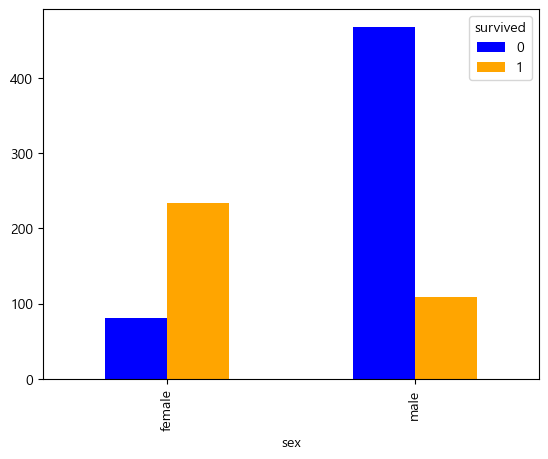

In [25]:
gender_survival_counts.plot(kind="bar", color=["blue", "orange"])

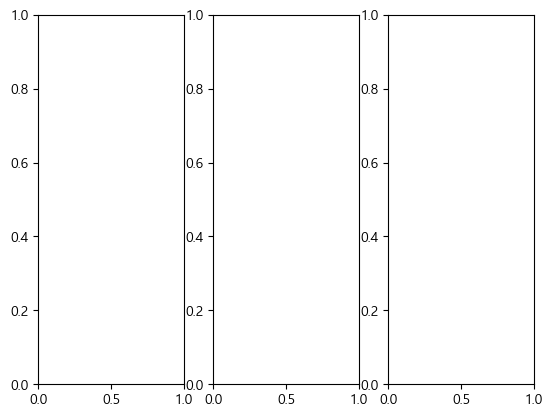

In [29]:
# 다음 시간에 이렇게
fig, axes = plt.subplots(1, 3)